In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Reading data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
df = pd.concat([df,df1])

df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [3]:
df [df.tripId == 6351558574044883205 ]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


### Showing different values in delay column with the frequency

In [5]:
df.delay.value_counts(normalize=True)

0     0.414514
1     0.357610
2     0.119549
3     0.056005
4     0.026023
5     0.012583
6     0.005742
7     0.003386
8     0.001479
9     0.001078
10    0.000857
11    0.000408
14    0.000249
12    0.000235
13    0.000166
15    0.000076
16    0.000021
19    0.000014
18    0.000007
Name: delay, dtype: float64

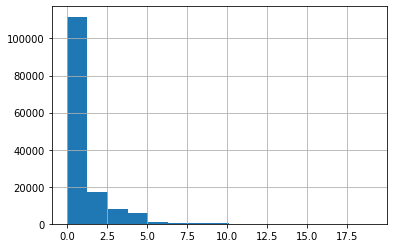

In [7]:
df.delay.hist(bins=15);

### Viewing data

In [8]:
df.delay.describe()

count    144719.000000
mean          1.034785
std           1.352726
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

In [9]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [10]:
df['direction'].value_counts()

Bronowice Małe                 16156
Krowodrza Górka                14574
Czerwone Maki P+R              13705
Nowy Bieżanów P+R              12391
Wzgórza K.                     10356
Borek Fałęcki                   9711
Salwator                        8971
Mistrzejowice                   8775
Kurdwanów P+R                   8212
Os.Piastów                      7855
Kopiec Wandy                    6000
Mały Płaszów                    5868
Bronowice                       5033
Prokocim                        3406
Cichy Kącik                     3310
Walcownia                       3309
Łagiewniki                      2848
Dworzec Tow.                    2344
Cm. Rakowicki                   1036
Kombinat                         805
Plac Centralny im.R.Reagana       54
Name: direction, dtype: int64

In [12]:
# we want to normalize the format of data
df.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis=1).factorize()[0]


array([0, 1, 2, ..., 5, 5, 5])

In [13]:
df['plannedTime'] = pd.to_datetime( df['plannedTime'] ) #convert values in plannedTime column to datatime
df[['plannedTime']].info()

df['hour'] = df['plannedTime'].dt.hour #assign an hour from plannedTime to new column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144719 entries, 0 to 73201
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   plannedTime  144719 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB


In [14]:
# delay in seconds
df['delay_secs'] = df['delay'].map(lambda x: x*60)
# normalize the format of value in direction column
df['direction_cat'] = df['direction'].factorize()[0]
# assign -1 to not available value 
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

# function to combine value from number and direction column
def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])

df['num_dir'] = df.apply(gen_id_num_direction, axis=1).factorize()[0]

# function to combine value from stop and direction column
def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])

df['stop_dir'] = df.apply(gen_id_stop_direction, axis=1).factorize()[0]


feats = ['number', 
         'stop', 
         'direction_cat', 
         'vehicleId', 
         'seq_num',
         'num_dir',
         'stop_dir',
         'hour'
        ]

X = df[ feats ].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)


(-49.730905331158446, 2.824042967729322)

y_pred => [0, 3, 2]

y_test => [1, 2, 0]

error => [1, 1, 2]